# 04 - Image Morphology

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn
from scipy.ndimage import correlate

from skimage import color, io, measure, img_as_ubyte
from skimage.util import img_as_float, img_as_ubyte
from skimage.filters import threshold_otsu, median, gaussian, prewitt_h,prewitt_v, prewitt
from skimage.morphology import erosion, dilation, opening, closing, disk

## Lecture stuff
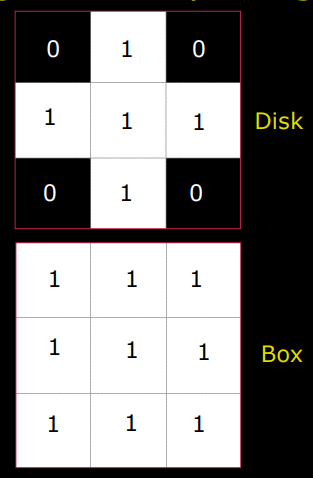

**Opening** = erosion + dilation
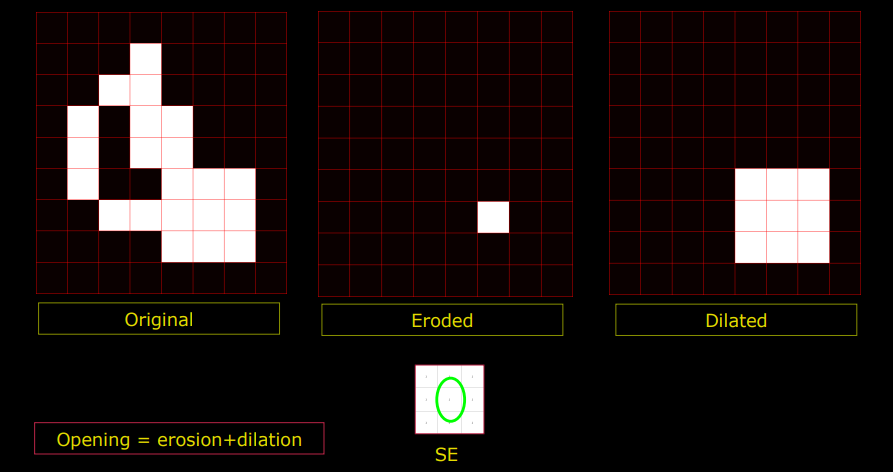

**Closing** = dilation + erosion
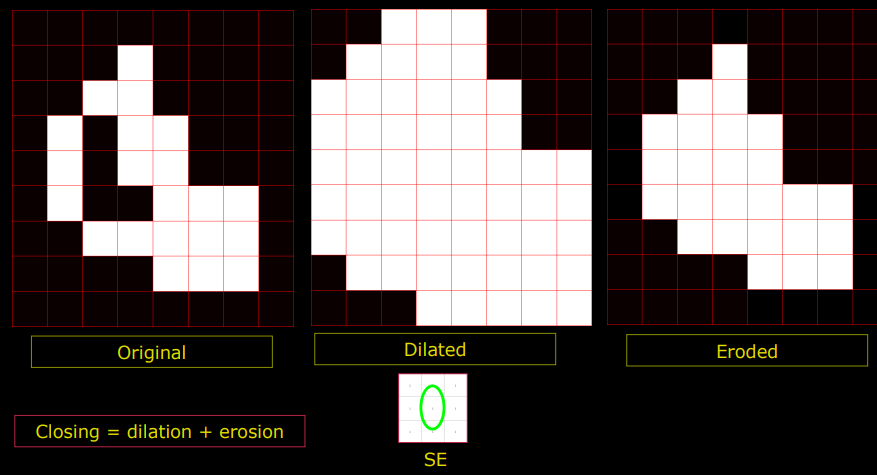

**Hit operation**, if just 1 in the SE match the input:

    output 1

else:

    output 0
    
**Fit operation**, If all 1 in the SE match with the input:

    output 1
else:

    output 0

In [62]:
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

### Exercise 1
We will start by computing a binary image from the lego image:

* Read the image into im_org.
* Convert the image to gray scale.
* Find a threshold using Otsu's method.
* Apply the treshold and generate a binary image bin_img.
* Visualize the image using plot_comparison(im_org, bin_img, 'Binary image')

As ncan be seen, the lego brick is not segmented perfectly. There are holes in the segmentation. Let us see if what we can do.

In [64]:
# Load image
im_org = io.imread('data/' + 'lego_5.png')

# Convert to grey
im_org = color.rgb2gray(im_org)

# To ubyte
im_lego = img_as_ubyte(im_org)

# Otsu threshold
thresh = threshold_otsu(image=im_lego)
bin_img = im_lego <= thresh

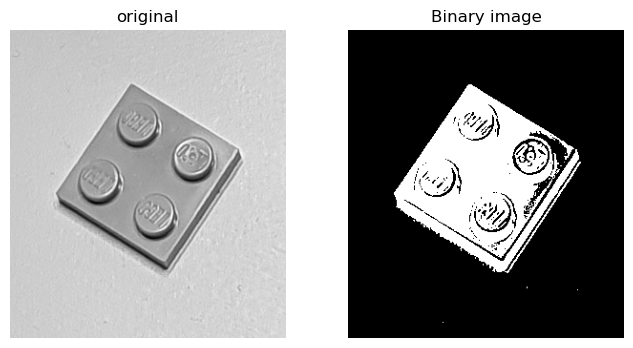

In [65]:
plot_comparison(im_org, bin_img, 'Binary image')

### Exercise 2 - Erosion
We will start by creating a structuring element. In scikit-image they are called footprint. A disk shaped footprint can be created by:


In [66]:
footprint = disk(3)
# Check the size and shape of the structuring element
print(footprint)

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


The morphological operation erosion can remove small objects, separate objects and make objects smaller. Based on the fit operation.

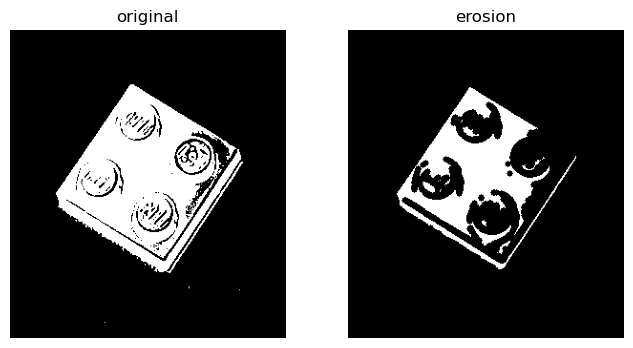

In [67]:
eroded = erosion(bin_img, footprint)
plot_comparison(bin_img, eroded, 'erosion')

### Exercise 3 - Dilation 
The morphological operation dilation makes objects larger, closes holes and connects objects. Based on the hit operation.

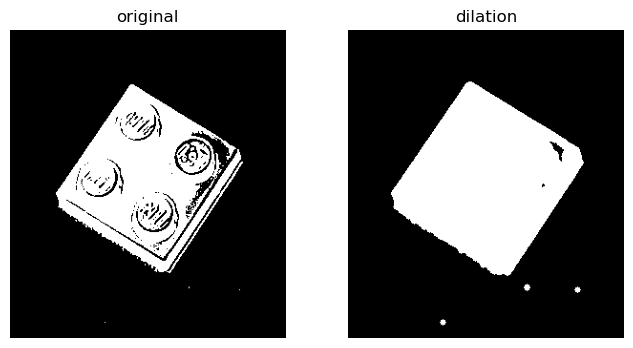

In [14]:
dilated = dilation(bin_img, footprint)
plot_comparison(bin_img, dilated, 'dilation')

### Exercise 4 - Opening
The morphological operation opening removes small objects without changing the size of the remaining objects. Try it on the binary lego image:

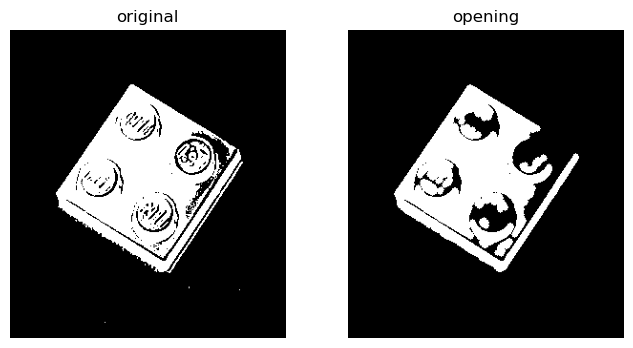

In [15]:
opened = opening(bin_img, footprint)
plot_comparison(bin_img, opened, 'opening')

### Exercise 5
The morphological operation closing closes holes in objects without changing the size of the remaining objects. Try it on the binary lego image:

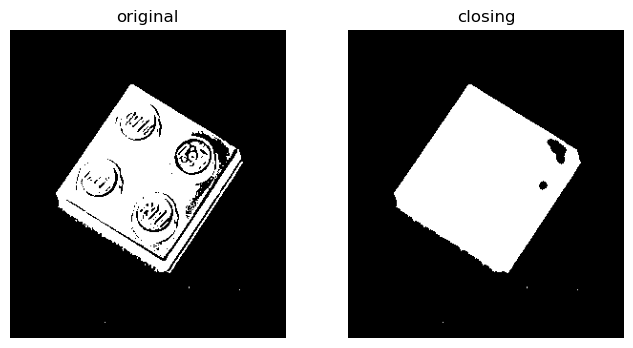

In [16]:
closed = closing(bin_img, footprint)
plot_comparison(bin_img, closed, 'closing')

## Object outline

In [17]:
def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline

### Exercise 6
Compute the outline of the binary image of the lego brick.

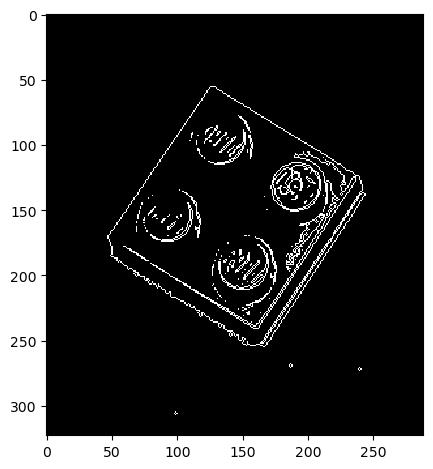

In [68]:
io.imshow(compute_outline(bin_img))
io.show()

### Exercise 7
Try the following:

1. Do an opening with a disk of size 1 on the binary lego image.
2. Do a closing with a disk of size 15 on the result of the opening.
3. Compute the outline and visualize it. What do you observe and why does the result look like that?

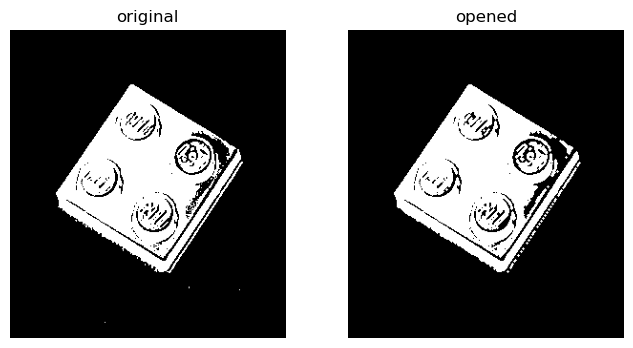

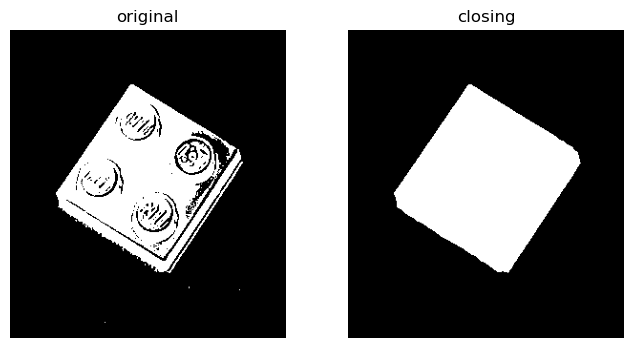

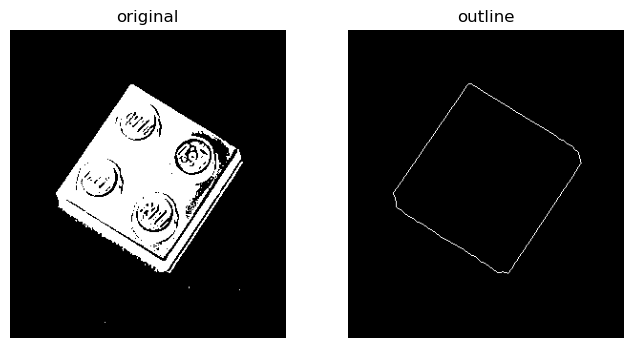

In [69]:
# 1.
footprint_1 = disk(1)
opened = opening(bin_img, footprint_1)

plot_comparison(bin_img, opened, 'opened')

# 2.
footprint_2 = disk(10)
closed = closing(opened, footprint_2)

plot_comparison(bin_img, closed, 'closing')

# 3.
plot_comparison(bin_img, compute_outline(closed), 'outline')


## Morphology on multiple objects

### Exercise 8
Start by:

1. Reading the lego_7.png image and convert it to gray scale.
2. Compute a treshold using Otsu's method and apply it to the image.
3. Show the binary image together with the original.
4. Compute the outline of the binary image and show it with the binary image.


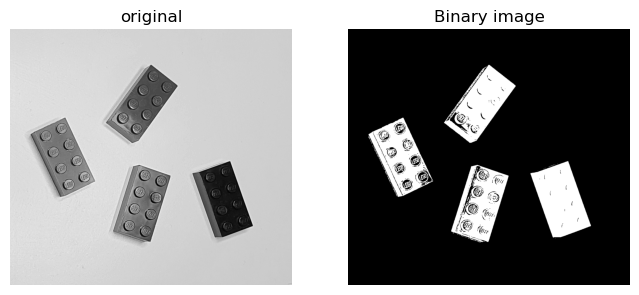

In [70]:
# Load image
im_org = io.imread('data/' + 'lego_7.png')

# Convert to grey
im_org = color.rgb2gray(im_org)

# To ubyte
im_lego = img_as_ubyte(im_org)

# Otsu threshold
thresh = threshold_otsu(image=im_lego)
bin_img = im_lego <= thresh

plot_comparison(im_org, bin_img, 'Binary image')

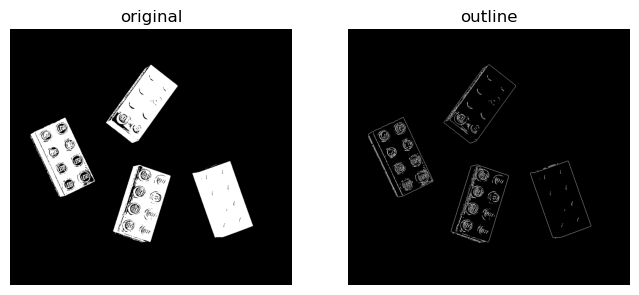

In [40]:
plot_comparison(bin_img, compute_outline(bin_img), 'outline')

### Exercise 9 - outline of the brick
We would like to find a way so only the outline of the entire brick is computed. So for each lego brick there should only be one closed curve.

Try using the closing operations and find out which size of footprint that gives the desired result?

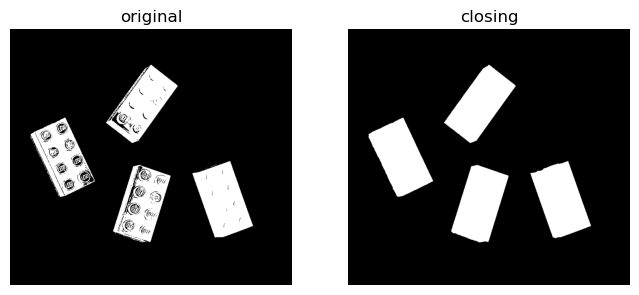

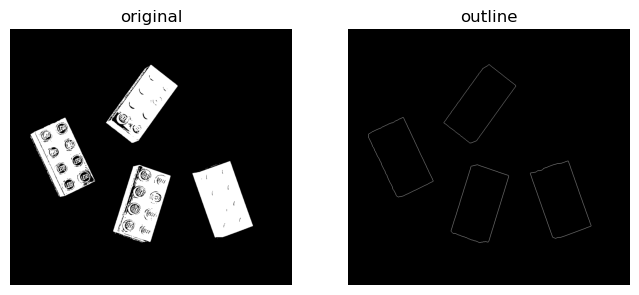

In [71]:
footprint_3 = disk(15)
closed = closing(bin_img, footprint_3)

plot_comparison(bin_img, closed, 'closing')
plot_comparison(bin_img, compute_outline(closed), 'outline')

### Exercise 10
Try the above on the lego_3.png image. What do you observe?

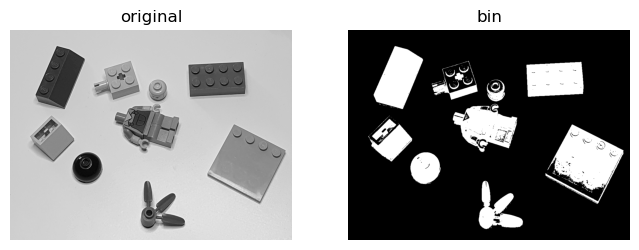

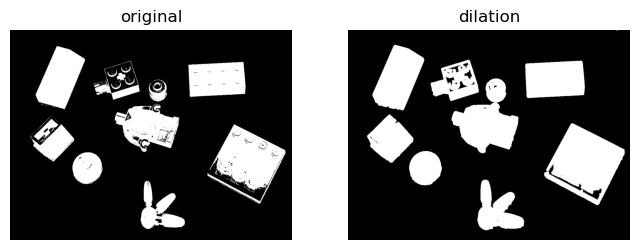

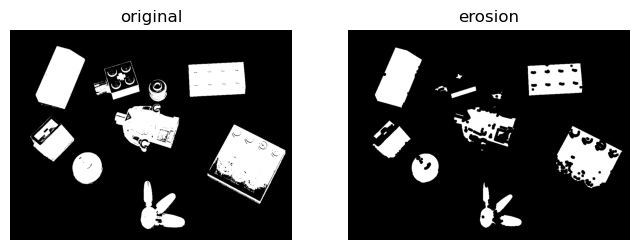

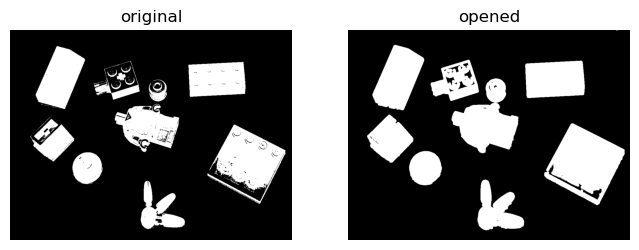

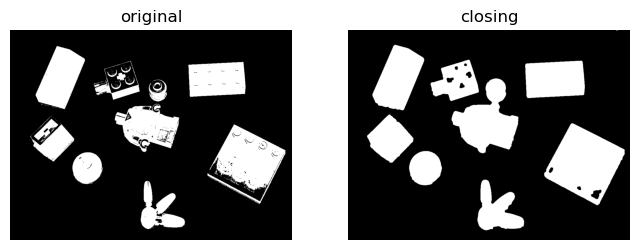

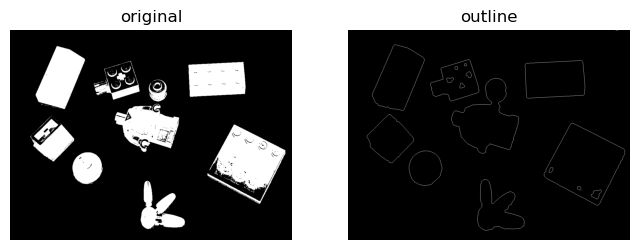

In [102]:
# Load image
im_org = io.imread('data/' + 'lego_3.png')

# Convert to grey
im_org = color.rgb2gray(im_org)

# To ubyte
im_lego = img_as_ubyte(im_org)

# Otsu threshold
thresh = threshold_otsu(image=im_lego)
bin_img = im_lego <= thresh

plot_comparison(im_org, bin_img, 'bin')

#Dilated
footprint_4 = disk(5)
dilated = dilation(bin_img, footprint_4)
plot_comparison(bin_img, dilated, 'dilation')

# Erosion
footprint_3 = disk(5)
eroded = erosion(bin_img, footprint_3)
plot_comparison(bin_img, eroded, 'erosion')

# Opened
footprint_1 = disk(5)
opened = opening(dilated, footprint_1)
plot_comparison(bin_img, opened, 'opened')

# Closing
footprint_2 = disk(5)
closed = closing(opened, footprint_2)
plot_comparison(bin_img, closed, 'closing')


#plot_comparison(bin_img, closed, 'closing')
plot_comparison(bin_img, compute_outline(closed), 'outline')

## Morphology on multiple connected objects
Morphology is a strong tool that can be used to clean images and separate connected objects. In image lego_9.png some lego bricks are touching. We would like to see if we can separate them.


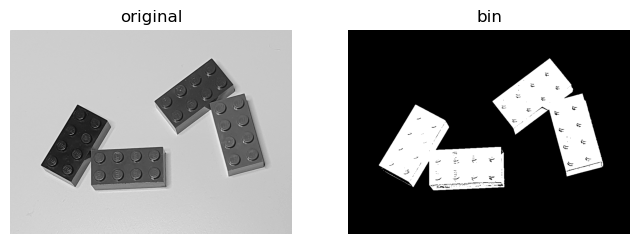

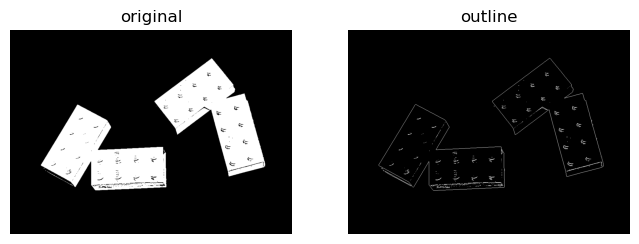

In [104]:
# Load image
im_org = io.imread('data/' + 'lego_9.png')

# Convert to grey
im_org = color.rgb2gray(im_org)

# To ubyte
im_lego = img_as_ubyte(im_org)

# Otsu threshold
thresh = threshold_otsu(image=im_lego)
bin_img = im_lego <= thresh

plot_comparison(im_org, bin_img, 'bin')
plot_comparison(bin_img, compute_outline(bin_img), 'outline')

### Exercise 12
Let us start by trying to remove the noise holes inside the lego bricks. Do that with an closing and find a good footprint size. Compute the outline and see what you observe?

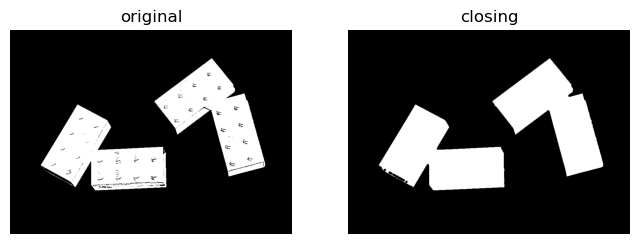

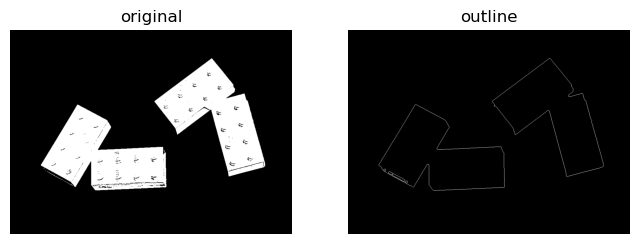

In [125]:
# Closing
footprint = disk(4)
closed = closing(bin_img, footprint)
plot_comparison(bin_img, closed, 'closing')
plot_comparison(bin_img, compute_outline(closed), 'outline')

### Exercise 13
Now we will try to separate the objects. Try using a erosion on the image that you repaired in exercise 12. You should probably use a rather large footprint. How large does it need to be in order to split the objects?

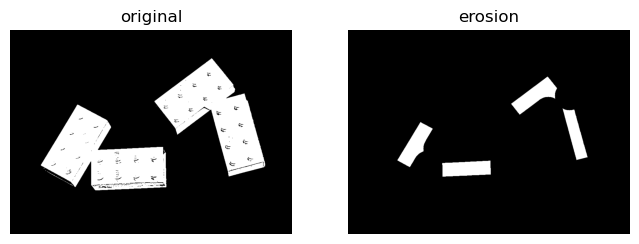

In [135]:
# Erosion
footprint_2 = disk(45)
eroded = erosion(closed, footprint_2)
plot_comparison(bin_img, eroded, 'erosion')

### Exercise 14
The objects lost a lot of size in the previous step. Try to use dilate to make them larger. How large can you make them before they start touching?

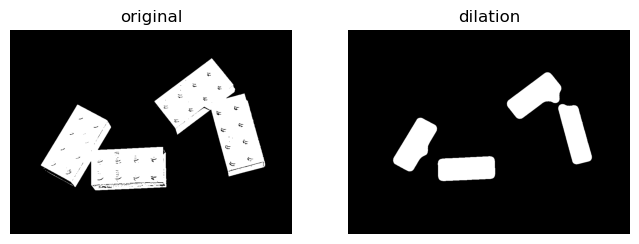

In [136]:
# Dilated
footprint_3 = disk(15)
dilated = dilation(eroded, footprint_3)
plot_comparison(bin_img, dilated, 'dilation')

## Puzzle piece analysis
We would like to make a program that can help solving puzzles. The first task is to outline each piece. A photo, puzzle_pieces.png is provided.

### Exercise 15
Use the previosly used methods to compute a binary image from the puzzle photo. What do you observe?

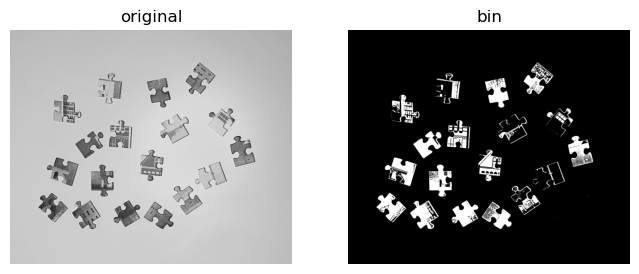

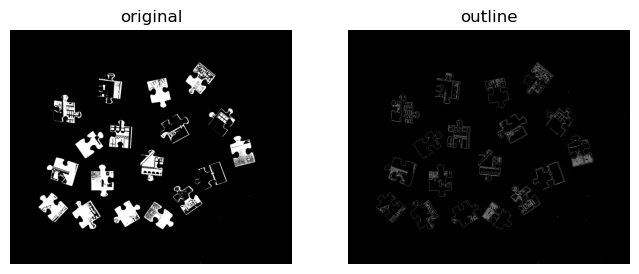

In [137]:
# Load image
im_org = io.imread('data/' + 'puzzle_pieces.png')

# Convert to grey
im_org = color.rgb2gray(im_org)

# To ubyte
im_lego = img_as_ubyte(im_org)

# Otsu threshold
thresh = threshold_otsu(image=im_lego)
bin_img = im_lego <= thresh

plot_comparison(im_org, bin_img, 'bin')
plot_comparison(bin_img, compute_outline(bin_img), 'outline')

### Exercise 16
Try to use a an opening with a large footprint to clean the binary. Compute the outline. Do we have good outlines for all the pieces?

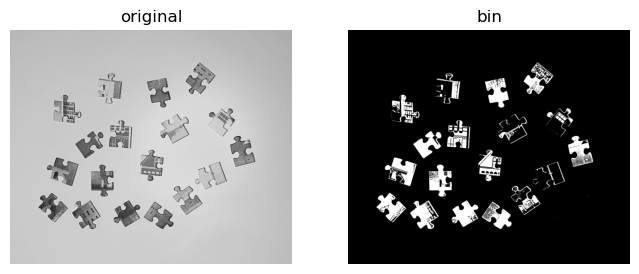

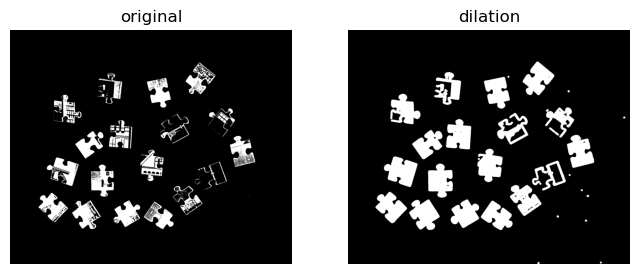

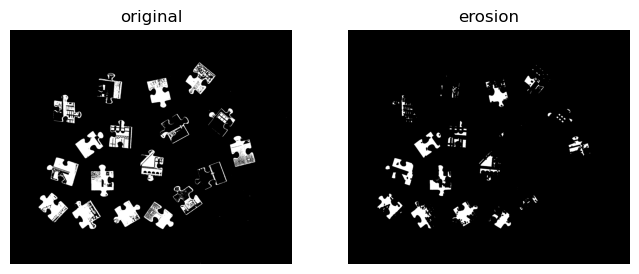

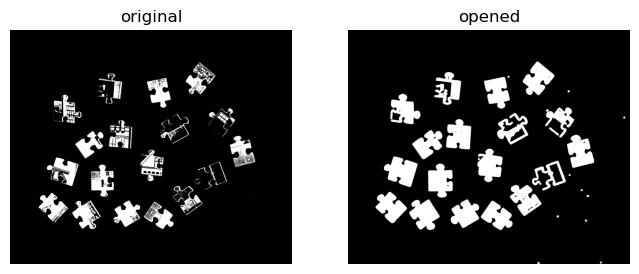

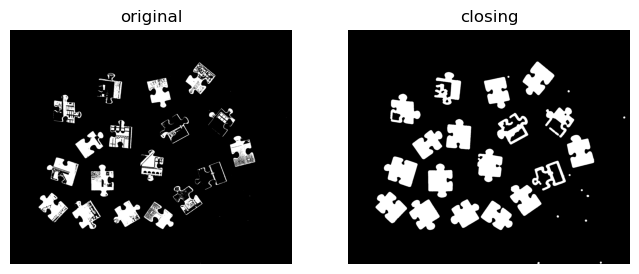

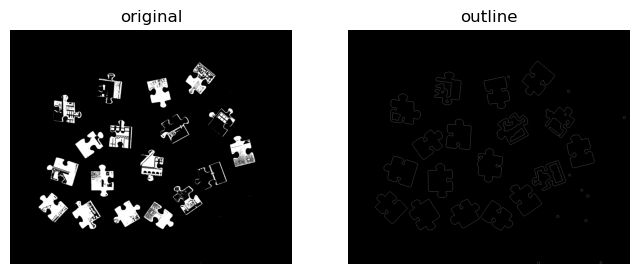

In [139]:
plot_comparison(im_org, bin_img, 'bin')

#Dilated
footprint_4 = disk(6)
dilated = dilation(bin_img, footprint_4)
plot_comparison(bin_img, dilated, 'dilation')

# Erosion
footprint_3 = disk(5)
eroded = erosion(bin_img, footprint_3)
plot_comparison(bin_img, eroded, 'erosion')

# Opened
footprint_1 = disk(5)
opened = opening(dilated, footprint_1)
plot_comparison(bin_img, opened, 'opened')

# Closing
footprint_2 = disk(5)
closed = closing(opened, footprint_2)
plot_comparison(bin_img, closed, 'closing')


#plot_comparison(bin_img, closed, 'closing')
plot_comparison(bin_img, compute_outline(closed), 'outline')